In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel("magnetic_valence.xlsx")
data.head()

,Magnets,Average_Magnetic_Valence,Magnetic_Moment_per_atom
0,Fe-V,1.78,2.14
1,Fe-Ni,1.60,2.19
2,Fe-Co,1.73,2.43
3,Ni-Co,0.98,1.71
4,Ni-Cu,-0.04,0.52


In [3]:
x=data.drop(['Magnets','Magnetic_Moment_per_atom'],axis=1)
y=data['Magnetic_Moment_per_atom']

In [4]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Average_Magnetic_Valence
0,1.000000
1,0.926230
2,0.979508
3,0.672131
4,0.254098


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.4,random_state=50)

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model=Sequential()
input_layer =keras.Input(shape=(len(x_train.columns),))
model.add(input_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))

In [8]:
model.compile( loss='mse',optimizer='Adam', metrics=['mse','mae',])

In [9]:
model.fit(x_train,y_train,epochs=100,batch_size=5)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6526 - mae: 1.0602 - mse: 1.6598
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5528 - mae: 1.0083 - mse: 1.5641 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1461 - mae: 0.8542 - mse: 1.1562 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1817 - mae: 0.8487 - mse: 1.1861 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9590 - mae: 0.8080 - mse: 0.9664 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1721 - mae: 0.8570 - mse: 1.1752 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8089 - mae: 0.6969 - mse: 0.8184 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1231 - mae: 0.8396 - mse: 1.1257 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7389 - mae: 0.6645 - mse: 0.7340 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7340 - mae: 0.6326 - mse: 0.7329 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8890 - mae

In [10]:
_, mse, mae = model.evaluate(x_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0194 - mae: 0.1064 - mse: 0.0194
Mean Squared Error: 0.1064
Mean Absolute Error: 0.0194


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


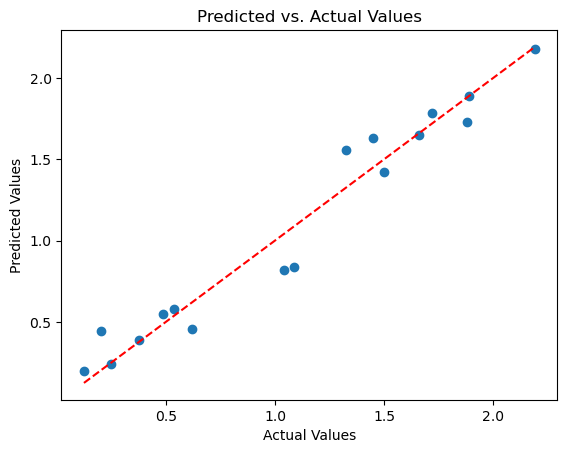

In [11]:
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.show()